In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train_data.csv',index_col="調査日",parse_dates=True)
df1 = pd.read_csv('data/train_data_1mon.csv',index_col="調査日",parse_dates=True)
df2 = pd.read_csv('data/train_data_2mon.csv',index_col="調査日",parse_dates=True)
df3 = pd.read_csv('data/train_data_3mon.csv',index_col="調査日",parse_dates=True)
df = df.resample("W-MON").last()
df1 = df1.resample("W-MON").last()
df2 = df2.resample("W-MON").last()
df3 = df3.resample("W-MON").last()

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [5]:
import statsmodels.api as sm 

1ヶ月前

In [6]:
df3

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-03-27,208,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-04-03,218,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-04-10,232,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-04-17,227,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-04-24,222,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,170,14.400000,6.571429,6.842857,16.585714,3.428571,7.442857,5.414286,2.714286,6.428571
2022-02-14,193,13.971429,7.214286,4.957143,15.385714,4.714286,4.000000,4.085714,3.571429,6.171429
2022-02-21,192,10.828571,0.000000,7.642857,11.614286,0.000000,8.300000,0.642857,0.785714,4.071429


In [7]:
train = df3[:-24]
test = df3[-24:]

In [8]:
len(train)

235

In [9]:
train.head()

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-03-27,208,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-04-03,218,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-04-10,232,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-04-17,227,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-04-24,222,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714


In [10]:
len(test)

24

In [11]:
y = train["キャベツ"]
X = train[train.columns[train.columns != "キャベツ"]]

In [12]:
y

調査日
2017-03-27    208
2017-04-03    218
2017-04-10    232
2017-04-17    227
2017-04-24    222
             ... 
2021-08-23    155
2021-08-30    161
2021-09-06    159
2021-09-13    188
2021-09-20    204
Freq: W-MON, Name: キャベツ, Length: 235, dtype: int64

In [13]:
X

,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,
2017-03-27,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-04-03,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-04-10,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-04-17,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-04-24,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...
2021-08-23,19.957143,6.214286,6.857143,19.500000,6.357143,7.071429,12.957143,5.214286,8.271429
2021-08-30,21.414286,3.642857,5.242857,20.700000,4.214286,4.957143,14.771429,5.642857,5.385714
2021-09-06,23.400000,0.416667,8.285714,22.000000,0.000000,9.157143,15.771429,3.714286,6.671429


コード参考:https://www.lifull.blog/entry/2019/12/25/151030

In [14]:
import itertools

p = q = range(0, 3)
sp = sd = sq = range(0, 2)

pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(sp, sd, sq))]

In [15]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(y,X, order = param, seasonal_order = param_seasonal,freq="W-MON")
            results = mod.fit()
            print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

print('AIC最小のモデル：', best_result)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51894D+00    |proj g|=  3.57330D-03

At iterate    5    f=  4.29863D+00    |proj g|=  3.03003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     27      1     0     0   8.447D-06   4.299D+00
  F =   4.2986268929390912     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42786D+00    |proj g|=  2.49014D-01

At iterate    5    f=  4.30647D+00    |proj g|=  5.07190D-02

At iterate   10    f=  4.29860D+00    |proj g|=  4.30268D-04

At iterate   15    f=  4.29860D+00    |proj g|=  1.97769D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     21      1     0     0   8.482D-05   4.299D+00
  F =   4.2985956497930262     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy

 This problem is unconstrained.



At iterate    0    f=  5.19707D+00    |proj g|=  2.35809D-03

At iterate    5    f=  3.56704D+00    |proj g|=  2.02489D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      8     23      1     0     0   9.888D-06   3.567D+00
  F =   3.5670053933355703     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1696.492534867718
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.



At iterate    0    f=  3.57021D+00    |proj g|=  2.38896D-01

At iterate    5    f=  3.49931D+00    |proj g|=  4.93404D-03

At iterate   10    f=  3.49007D+00    |proj g|=  2.46939D-03

At iterate   15    f=  3.48939D+00    |proj g|=  8.09991D-04

At iterate   20    f=  3.48922D+00    |proj g|=  4.51942D-04

At iterate   25    f=  3.48919D+00    |proj g|=  4.14621D-04

At iterate   30    f=  3.48916D+00    |proj g|=  7.76367D-04

At iterate   35    f=  3.48914D+00    |proj g|=  4.82960D-04

At iterate   40    f=  3.48913D+00    |proj g|=  1.42654D-04

At iterate   45    f=  3.48913D+00    |proj g|=  1.34238D-04

At iterate   50    f=  3.48913D+00    |proj g|=  2.24531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.35940D+00    |proj g|=  3.99245D-02

At iterate    5    f=  4.29860D+00    |proj g|=  6.57494D-04

At iterate   10    f=  4.29859D+00    |proj g|=  2.91362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     12      1     0     0   1.877D-05   4.299D+00
  F =   4.2985944233059943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2042.3

 This problem is unconstrained.



At iterate    0    f=  4.41700D+00    |proj g|=  2.88884D-01

At iterate    5    f=  4.33638D+00    |proj g|=  1.18529D-01

At iterate   10    f=  4.29863D+00    |proj g|=  4.12381D-03

At iterate   15    f=  4.29860D+00    |proj g|=  3.39013D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     16     19      1     0     0   2.884D-05   4.299D+00
  F =   4.2986046839165661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.54970D+00    |proj g|=  1.17177D-01

At iterate    5    f=  3.52224D+00    |proj g|=  3.16851D-02

At iterate   10    f=  3.51185D+00    |proj g|=  6.25319D-04

At iterate   15    f=  3.51178D+00    |proj g|=  6.73026D-05

At iterate   20    f=  3.51178D+00    |proj g|=  7.40877D-05

At iterate   25    f=  3.51178D+00    |proj g|=  2.29312D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     34      1     0     0   1.413D-05   3.512D+00
  F =   3.5117798009399257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.57708D+00    |proj g|=  9.71558D-02

At iterate    5    f=  3.50061D+00    |proj g|=  3.20584D-02

At iterate   10    f=  3.49116D+00    |proj g|=  3.27394D-03

At iterate   15    f=  3.48979D+00    |proj g|=  1.16570D-03

At iterate   20    f=  3.48941D+00    |proj g|=  5.02289D-03

At iterate   25    f=  3.48916D+00    |proj g|=  1.48995D-03

At iterate   30    f=  3.48912D+00    |proj g|=  5.86016D-04

At iterate   35    f=  3.48904D+00    |proj g|=  4.70426D-04

At iterate   40    f=  3.48902D+00    |proj g|=  9.56629D-05

At iterate   45    f=  3.48902D+00    |proj g|=  6.83923D-05

At iterate   50    f=  3.48902D+00    |proj g|=  3.99314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.08390D+00    |proj g|=  6.57090D-04

At iterate   30    f=  4.08390D+00    |proj g|=  4.02291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     34     39      1     0     0   1.052D-05   4.084D+00
  F =   4.0839035255806682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 0, 0, 52) - AIC: 1941.434657022914
RUNNING THE L-BFGS-B CODE

           * * *

Machi

 This problem is unconstrained.



At iterate    0    f=  4.16380D+00    |proj g|=  1.57445D-01

At iterate    5    f=  4.09245D+00    |proj g|=  9.14163D-03

At iterate   10    f=  4.08567D+00    |proj g|=  4.97681D-03

At iterate   15    f=  4.08384D+00    |proj g|=  7.02957D-03

At iterate   20    f=  4.08330D+00    |proj g|=  3.31173D-03

At iterate   25    f=  4.08318D+00    |proj g|=  6.24103D-04

At iterate   30    f=  4.08315D+00    |proj g|=  1.88104D-04

At iterate   35    f=  4.08315D+00    |proj g|=  8.64244D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     39     42      1     0     0   8.563D-05   4.083D+00
  F =   4.08315369496

 This problem is unconstrained.



At iterate    0    f=  3.43803D+00    |proj g|=  1.33674D-01

At iterate    5    f=  3.39114D+00    |proj g|=  7.36321D-03

At iterate   10    f=  3.38884D+00    |proj g|=  3.23072D-03

At iterate   15    f=  3.38813D+00    |proj g|=  1.28342D-04

At iterate   20    f=  3.38813D+00    |proj g|=  1.04704D-04

At iterate   25    f=  3.38813D+00    |proj g|=  4.06794D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     25     29      1     0     0   4.068D-05   3.388D+00
  F =   3.3881292666396607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.43803D+00    |proj g|=  2.11876D-01

At iterate    5    f=  3.34426D+00    |proj g|=  9.79530D-03

At iterate   10    f=  3.32131D+00    |proj g|=  1.28949D-02

At iterate   15    f=  3.31876D+00    |proj g|=  3.61109D-03

At iterate   20    f=  3.31854D+00    |proj g|=  4.39659D-04

At iterate   25    f=  3.31852D+00    |proj g|=  3.88245D-04

At iterate   30    f=  3.31852D+00    |proj g|=  7.36087D-05

At iterate   35    f=  3.31852D+00    |proj g|=  3.33313D-05

At iterate   40    f=  3.31852D+00    |proj g|=  2.15104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     42     48   

 This problem is unconstrained.



At iterate    0    f=  4.13839D+00    |proj g|=  1.76477D-01

At iterate    5    f=  4.09221D+00    |proj g|=  1.26111D-02

At iterate   10    f=  4.08533D+00    |proj g|=  4.17848D-03

At iterate   15    f=  4.08338D+00    |proj g|=  6.67665D-03

At iterate   20    f=  4.08321D+00    |proj g|=  2.56865D-03

At iterate   25    f=  4.08314D+00    |proj g|=  7.63117D-04

At iterate   30    f=  4.08312D+00    |proj g|=  1.06682D-04

At iterate   35    f=  4.08312D+00    |proj g|=  9.25616D-05

At iterate   40    f=  4.08312D+00    |proj g|=  2.76320D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     43     48   

 This problem is unconstrained.



At iterate    0    f=  4.15555D+00    |proj g|=  1.57612D-01

At iterate    5    f=  4.09255D+00    |proj g|=  1.41347D-02

At iterate   10    f=  4.08529D+00    |proj g|=  4.67292D-03

At iterate   15    f=  4.08348D+00    |proj g|=  2.37881D-03

At iterate   20    f=  4.08327D+00    |proj g|=  1.71265D-03

At iterate   25    f=  4.08313D+00    |proj g|=  7.21634D-04

At iterate   30    f=  4.08307D+00    |proj g|=  2.02087D-03

At iterate   35    f=  4.08302D+00    |proj g|=  2.65550D-03

At iterate   40    f=  4.08281D+00    |proj g|=  3.49075D-03

At iterate   45    f=  4.08243D+00    |proj g|=  3.63783D-03

At iterate   50    f=  4.08216D+00    |proj g|=  9.05779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.39717D+00    |proj g|=  1.31647D-01

At iterate    5    f=  3.35041D+00    |proj g|=  1.47896D-02

At iterate   10    f=  3.33882D+00    |proj g|=  1.02984D-02

At iterate   15    f=  3.33632D+00    |proj g|=  8.20506D-04

At iterate   20    f=  3.33632D+00    |proj g|=  3.03837D-04

At iterate   25    f=  3.33631D+00    |proj g|=  6.51442D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     29     32      1     0     0   1.323D-05   3.336D+00
  F =   3.3363144397587416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.48003D+00    |proj g|=  1.53898D-01

At iterate    5    f=  3.35816D+00    |proj g|=  4.13920D-02

At iterate   10    f=  3.33689D+00    |proj g|=  9.31642D-03

At iterate   15    f=  3.32028D+00    |proj g|=  6.28972D-03

At iterate   20    f=  3.31840D+00    |proj g|=  3.58957D-03

At iterate   25    f=  3.31799D+00    |proj g|=  3.80406D-03

At iterate   30    f=  3.31772D+00    |proj g|=  6.11047D-04

At iterate   35    f=  3.31770D+00    |proj g|=  5.29585D-04

At iterate   40    f=  3.31769D+00    |proj g|=  1.03673D-03

At iterate   45    f=  3.31767D+00    |proj g|=  5.57278D-04

At iterate   50    f=  3.31766D+00    |proj g|=  1.97189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.03780D+00    |proj g|=  3.40493D-03

At iterate   25    f=  4.03768D+00    |proj g|=  5.07780D-04

At iterate   30    f=  4.03766D+00    |proj g|=  2.99481D-04

At iterate   35    f=  4.03766D+00    |proj g|=  8.72368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     42      1     0     0   1.909D-05   4.038D+00
  F =   4.0376606818524587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  4.09983D+00    |proj g|=  1.95706D-01

At iterate    5    f=  4.04467D+00    |proj g|=  7.80216D-03

At iterate   10    f=  4.04034D+00    |proj g|=  1.21373D-02

At iterate   15    f=  4.03845D+00    |proj g|=  4.70278D-03

At iterate   20    f=  4.03773D+00    |proj g|=  3.14999D-03

At iterate   25    f=  4.03762D+00    |proj g|=  8.81860D-04

At iterate   30    f=  4.03760D+00    |proj g|=  8.23115D-04

At iterate   35    f=  4.03759D+00    |proj g|=  1.07659D-04

At iterate   40    f=  4.03759D+00    |proj g|=  3.78167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     41     45   

 This problem is unconstrained.



At iterate    0    f=  3.38304D+00    |proj g|=  7.00078D-02

At iterate    5    f=  3.37001D+00    |proj g|=  5.33786D-03

At iterate   10    f=  3.36817D+00    |proj g|=  1.85647D-03

At iterate   15    f=  3.36774D+00    |proj g|=  1.92793D-03

At iterate   20    f=  3.36766D+00    |proj g|=  4.86983D-04

At iterate   25    f=  3.36766D+00    |proj g|=  2.80654D-04

At iterate   30    f=  3.36766D+00    |proj g|=  2.63173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     30     34      1     0     0   2.632D-05   3.368D+00
  F =   3.3676568190116871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.38304D+00    |proj g|=  2.24968D-01

At iterate    5    f=  3.31821D+00    |proj g|=  1.03709D-02

At iterate   10    f=  3.30162D+00    |proj g|=  2.20760D-02

At iterate   15    f=  3.29325D+00    |proj g|=  8.34915D-03

At iterate   20    f=  3.29246D+00    |proj g|=  1.90732D-03

At iterate   25    f=  3.29216D+00    |proj g|=  7.65580D-04

At iterate   30    f=  3.29209D+00    |proj g|=  1.05201D-03

At iterate   35    f=  3.29209D+00    |proj g|=  1.94072D-04

At iterate   40    f=  3.29208D+00    |proj g|=  3.28754D-04

At iterate   45    f=  3.29208D+00    |proj g|=  1.61888D-04

At iterate   50    f=  3.29208D+00    |proj g|=  5.55034D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.05265D+00    |proj g|=  6.92214D-02

At iterate    5    f=  4.04398D+00    |proj g|=  1.19690D-02

At iterate   10    f=  4.04059D+00    |proj g|=  2.69197D-02

At iterate   15    f=  4.03857D+00    |proj g|=  1.24114D-02

At iterate   20    f=  4.03777D+00    |proj g|=  1.60061D-03

At iterate   25    f=  4.03762D+00    |proj g|=  5.44129D-04

At iterate   30    f=  4.03760D+00    |proj g|=  3.58893D-04

At iterate   35    f=  4.03759D+00    |proj g|=  5.24778D-05

At iterate   40    f=  4.03759D+00    |proj g|=  1.10620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     43     46   

 This problem is unconstrained.



At iterate    0    f=  4.08765D+00    |proj g|=  2.10186D-01

At iterate    5    f=  4.04446D+00    |proj g|=  1.97099D-02

At iterate   10    f=  4.04052D+00    |proj g|=  1.76845D-02

At iterate   15    f=  4.03874D+00    |proj g|=  8.64660D-03

At iterate   20    f=  4.03783D+00    |proj g|=  2.11406D-03

At iterate   25    f=  4.03765D+00    |proj g|=  3.48766D-03

At iterate   30    f=  4.03761D+00    |proj g|=  6.91620D-04

At iterate   35    f=  4.03760D+00    |proj g|=  1.90277D-04

At iterate   40    f=  4.03760D+00    |proj g|=  5.61456D-05

At iterate   45    f=  4.03760D+00    |proj g|=  3.29439D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.33686D+00    |proj g|=  5.30835D-02

At iterate    5    f=  3.32347D+00    |proj g|=  1.23717D-02

At iterate   10    f=  3.31540D+00    |proj g|=  6.66677D-03

At iterate   15    f=  3.31173D+00    |proj g|=  6.71521D-03

At iterate   20    f=  3.31158D+00    |proj g|=  3.74492D-04

At iterate   25    f=  3.31158D+00    |proj g|=  1.75631D-04

At iterate   30    f=  3.31158D+00    |proj g|=  2.46038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     31     35      1     0     0   3.110D-05   3.312D+00
  F =   3.3115752882664093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.41012D+00    |proj g|=  1.41229D-01

At iterate    5    f=  3.33101D+00    |proj g|=  3.59455D-02

At iterate   10    f=  3.31113D+00    |proj g|=  9.92715D-03

At iterate   15    f=  3.29534D+00    |proj g|=  1.23414D-02

At iterate   20    f=  3.29249D+00    |proj g|=  5.83501D-03

At iterate   25    f=  3.29204D+00    |proj g|=  3.76279D-03

At iterate   30    f=  3.29176D+00    |proj g|=  7.76137D-04

At iterate   35    f=  3.29165D+00    |proj g|=  3.90100D-04

At iterate   40    f=  3.29164D+00    |proj g|=  4.74663D-04

At iterate   45    f=  3.29163D+00    |proj g|=  1.59006D-03

At iterate   50    f=  3.29162D+00    |proj g|=  4.34659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.07393D+00    |proj g|=  6.58837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     25     31      1     0     0   6.588D-05   4.074D+00
  F =   4.0739286113762789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(0, 0, 0, 52) - AIC: 1936.7464473468513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           

 This problem is unconstrained.



At iterate    0    f=  4.13561D+00    |proj g|=  2.13453D-01

At iterate    5    f=  4.07727D+00    |proj g|=  5.50185D-03

At iterate   10    f=  4.07506D+00    |proj g|=  3.45356D-03

At iterate   15    f=  4.07397D+00    |proj g|=  1.20637D-03

At iterate   20    f=  4.07393D+00    |proj g|=  1.94079D-04

At iterate   25    f=  4.07393D+00    |proj g|=  1.51483D-04

At iterate   30    f=  4.07393D+00    |proj g|=  6.56710D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     32     39      1     0     0   7.341D-05   4.074D+00
  F =   4.0739264500017551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.41062D+00    |proj g|=  2.92640D-02

At iterate    5    f=  3.40752D+00    |proj g|=  3.84900D-03

At iterate   10    f=  3.40725D+00    |proj g|=  2.18862D-04

At iterate   15    f=  3.40724D+00    |proj g|=  1.32097D-04

At iterate   20    f=  3.40724D+00    |proj g|=  1.54716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     21     24      1     0     0   1.290D-05   3.407D+00
  F =   3.4072388480673461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  3.41062D+00    |proj g|=  2.40838D-01

At iterate    5    f=  3.34319D+00    |proj g|=  1.01150D-02

At iterate   10    f=  3.32630D+00    |proj g|=  3.28455D-02

At iterate   15    f=  3.31964D+00    |proj g|=  7.87881D-03

At iterate   20    f=  3.31900D+00    |proj g|=  2.53988D-03

At iterate   25    f=  3.31883D+00    |proj g|=  1.52000D-03

At iterate   30    f=  3.31877D+00    |proj g|=  6.83379D-04

At iterate   35    f=  3.31874D+00    |proj g|=  3.07791D-04

At iterate   40    f=  3.31871D+00    |proj g|=  1.72635D-04

At iterate   45    f=  3.31871D+00    |proj g|=  8.10656D-05

At iterate   50    f=  3.31870D+00    |proj g|=  1.36072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.08113D+00    |proj g|=  3.87756D-02

At iterate    5    f=  4.07717D+00    |proj g|=  5.78508D-03

At iterate   10    f=  4.07495D+00    |proj g|=  2.47493D-03

At iterate   15    f=  4.07397D+00    |proj g|=  2.00523D-03

At iterate   20    f=  4.07393D+00    |proj g|=  2.78284D-04

At iterate   25    f=  4.07393D+00    |proj g|=  1.44794D-04

At iterate   30    f=  4.07393D+00    |proj g|=  5.86983D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     32     39      1     0     0   1.007D-05   4.074D+00
  F =   4.0739262880834541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  4.12196D+00    |proj g|=  2.28217D-01

At iterate    5    f=  4.07792D+00    |proj g|=  2.12374D-02

At iterate   10    f=  4.07580D+00    |proj g|=  1.35194D-02

At iterate   15    f=  4.07468D+00    |proj g|=  1.17526D-02

At iterate   20    f=  4.07404D+00    |proj g|=  2.33142D-03

At iterate   25    f=  4.07393D+00    |proj g|=  1.50703D-03

At iterate   30    f=  4.07392D+00    |proj g|=  1.16302D-04

At iterate   35    f=  4.07392D+00    |proj g|=  5.36935D-05

At iterate   40    f=  4.07392D+00    |proj g|=  3.07926D-05

At iterate   45    f=  4.07392D+00    |proj g|=  1.99822D-04

At iterate   50    f=  4.07392D+00    |proj g|=  2.11416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.35896D+00    |proj g|=  4.50153D-02

At iterate    5    f=  3.34943D+00    |proj g|=  8.79280D-03

At iterate   10    f=  3.34228D+00    |proj g|=  5.61981D-03

At iterate   15    f=  3.34127D+00    |proj g|=  4.57995D-04

At iterate   20    f=  3.34126D+00    |proj g|=  1.31682D-04

At iterate   25    f=  3.34126D+00    |proj g|=  1.94949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     28     34      1     0     0   1.435D-05   3.341D+00
  F =   3.3412593797764569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.42490D+00    |proj g|=  1.27591D-01

At iterate    5    f=  3.34563D+00    |proj g|=  3.75839D-02

At iterate   10    f=  3.33533D+00    |proj g|=  9.21101D-03

At iterate   15    f=  3.32095D+00    |proj g|=  4.42174D-03

At iterate   20    f=  3.31934D+00    |proj g|=  2.06381D-03

At iterate   25    f=  3.31889D+00    |proj g|=  9.88783D-04

At iterate   30    f=  3.31877D+00    |proj g|=  7.66488D-04

At iterate   35    f=  3.31873D+00    |proj g|=  3.25718D-04

At iterate   40    f=  3.31872D+00    |proj g|=  6.54625D-04

At iterate   45    f=  3.31870D+00    |proj g|=  1.98298D-04

At iterate   50    f=  3.31870D+00    |proj g|=  1.83021D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.04412D+00    |proj g|=  8.64011D-04

At iterate   25    f=  4.04411D+00    |proj g|=  8.62233D-04

At iterate   30    f=  4.04410D+00    |proj g|=  4.18207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     34     38      1     0     0   1.754D-05   4.044D+00
  F =   4.0441040733409102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 1), 季節変動パラメータ(0, 0, 0, 52) - AIC: 1924.7

 This problem is unconstrained.



At iterate    0    f=  4.10589D+00    |proj g|=  1.91413D-01

At iterate    5    f=  4.05219D+00    |proj g|=  7.74073D-03

At iterate   10    f=  4.04622D+00    |proj g|=  4.52605D-03

At iterate   15    f=  4.04429D+00    |proj g|=  3.44100D-03

At iterate   20    f=  4.04400D+00    |proj g|=  1.65442D-03

At iterate   25    f=  4.04396D+00    |proj g|=  8.03506D-04

At iterate   30    f=  4.04395D+00    |proj g|=  3.63420D-04

At iterate   35    f=  4.04395D+00    |proj g|=  1.15608D-04

At iterate   40    f=  4.04395D+00    |proj g|=  3.90497D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     42     44   

 This problem is unconstrained.



At iterate    0    f=  3.38911D+00    |proj g|=  7.27031D-02

At iterate    5    f=  3.37327D+00    |proj g|=  6.24074D-03

At iterate   10    f=  3.37117D+00    |proj g|=  1.77154D-03

At iterate   15    f=  3.37075D+00    |proj g|=  2.14971D-03

At iterate   20    f=  3.37072D+00    |proj g|=  5.29100D-04

At iterate   25    f=  3.37072D+00    |proj g|=  1.38740D-04

At iterate   30    f=  3.37072D+00    |proj g|=  6.71276D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     30     34      1     0     0   6.713D-06   3.371D+00
  F =   3.3707187023483982     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    0    f=  3.38911D+00    |proj g|=  2.24760D-01

At iterate    5    f=  3.32187D+00    |proj g|=  1.92885D-02

At iterate   10    f=  3.30625D+00    |proj g|=  2.25095D-02

At iterate   15    f=  3.29597D+00    |proj g|=  8.24047D-03

At iterate   20    f=  3.29443D+00    |proj g|=  3.41415D-03

At iterate   25    f=  3.29421D+00    |proj g|=  2.67655D-03

At iterate   30    f=  3.29414D+00    |proj g|=  5.93624D-04

At iterate   35    f=  3.29413D+00    |proj g|=  3.37407D-04

At iterate   40    f=  3.29413D+00    |proj g|=  2.08455D-04

At iterate   45    f=  3.29412D+00    |proj g|=  2.63558D-04

At iterate   50    f=  3.29412D+00    |proj g|=  9.21918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.06090D+00    |proj g|=  7.64294D-02

At iterate    5    f=  4.05083D+00    |proj g|=  1.03400D-02

At iterate   10    f=  4.04619D+00    |proj g|=  6.12378D-03

At iterate   15    f=  4.04438D+00    |proj g|=  3.58019D-03

At iterate   20    f=  4.04401D+00    |proj g|=  4.26685D-03

At iterate   25    f=  4.04395D+00    |proj g|=  5.91813D-04

At iterate   30    f=  4.04394D+00    |proj g|=  2.50223D-04

At iterate   35    f=  4.04394D+00    |proj g|=  8.26073D-05

At iterate   40    f=  4.04394D+00    |proj g|=  1.58887D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     40     44   

 This problem is unconstrained.



At iterate    0    f=  4.09390D+00    |proj g|=  2.04589D-01

At iterate    5    f=  4.05186D+00    |proj g|=  1.57734D-02

At iterate   10    f=  4.04764D+00    |proj g|=  2.52288D-02

At iterate   15    f=  4.04561D+00    |proj g|=  1.20864D-02

At iterate   20    f=  4.04422D+00    |proj g|=  2.24869D-03

At iterate   25    f=  4.04399D+00    |proj g|=  1.48996D-03

At iterate   30    f=  4.04396D+00    |proj g|=  4.01798D-04

At iterate   35    f=  4.04395D+00    |proj g|=  2.22465D-04

At iterate   40    f=  4.04395D+00    |proj g|=  4.97157D-04

At iterate   45    f=  4.04395D+00    |proj g|=  1.02884D-03

At iterate   50    f=  4.04392D+00    |proj g|=  2.96108D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.34319D+00    |proj g|=  5.60265D-02

At iterate    5    f=  3.32802D+00    |proj g|=  1.14006D-02

At iterate   10    f=  3.31745D+00    |proj g|=  6.25710D-03

At iterate   15    f=  3.31352D+00    |proj g|=  4.34768D-03

At iterate   20    f=  3.31343D+00    |proj g|=  6.69762D-04

At iterate   25    f=  3.31342D+00    |proj g|=  1.37489D-04

At iterate   30    f=  3.31342D+00    |proj g|=  1.25758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     32     35      1     0     0   1.909D-05   3.313D+00
  F =   3.3134230493122896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.41736D+00    |proj g|=  1.40912D-01

At iterate    5    f=  3.33564D+00    |proj g|=  2.82866D-02

At iterate   10    f=  3.31278D+00    |proj g|=  9.78419D-03

At iterate   15    f=  3.29843D+00    |proj g|=  1.39451D-02

At iterate   20    f=  3.29502D+00    |proj g|=  4.64644D-03

At iterate   25    f=  3.29420D+00    |proj g|=  3.61196D-03

At iterate   30    f=  3.29388D+00    |proj g|=  2.51998D-03

At iterate   35    f=  3.29380D+00    |proj g|=  2.76561D-04

At iterate   40    f=  3.29379D+00    |proj g|=  2.68556D-04

At iterate   45    f=  3.29378D+00    |proj g|=  1.88737D-04

At iterate   50    f=  3.29377D+00    |proj g|=  5.95535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.03454D+00    |proj g|=  1.59213D-03

At iterate   25    f=  4.03435D+00    |proj g|=  6.88062D-04

At iterate   30    f=  4.03433D+00    |proj g|=  1.00401D-03

At iterate   35    f=  4.03432D+00    |proj g|=  5.45193D-04

At iterate   40    f=  4.03432D+00    |proj g|=  5.07807D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     41     46      1     0     0   3.330D-05   4.034D+00
  F =   4.0343189038167067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  4.09637D+00    |proj g|=  1.96303D-01

At iterate    5    f=  4.04185D+00    |proj g|=  1.96866D-02

At iterate   10    f=  4.03864D+00    |proj g|=  1.00917D-02

At iterate   15    f=  4.03593D+00    |proj g|=  5.86207D-03

At iterate   20    f=  4.03460D+00    |proj g|=  2.70135D-03

At iterate   25    f=  4.03435D+00    |proj g|=  3.53940D-03

At iterate   30    f=  4.03431D+00    |proj g|=  6.31279D-04

At iterate   35    f=  4.03430D+00    |proj g|=  3.19805D-04

At iterate   40    f=  4.03429D+00    |proj g|=  3.06598D-04

At iterate   45    f=  4.03429D+00    |proj g|=  1.38918D-04

At iterate   50    f=  4.03429D+00    |proj g|=  6.88992D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.38293D+00    |proj g|=  6.97824D-02

At iterate    5    f=  3.36975D+00    |proj g|=  5.27915D-03

At iterate   10    f=  3.36789D+00    |proj g|=  2.00859D-03

At iterate   15    f=  3.36753D+00    |proj g|=  3.40385D-03

At iterate   20    f=  3.36732D+00    |proj g|=  1.33369D-03

At iterate   25    f=  3.36730D+00    |proj g|=  4.53430D-04

At iterate   30    f=  3.36730D+00    |proj g|=  9.66588D-05

At iterate   35    f=  3.36730D+00    |proj g|=  9.52762D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39     47      1     0     0   1.764D-05   3.367D+00
  F =   3.36729725454

 This problem is unconstrained.



At iterate    0    f=  3.38293D+00    |proj g|=  2.24844D-01

At iterate    5    f=  3.31850D+00    |proj g|=  1.09155D-02

At iterate   10    f=  3.30667D+00    |proj g|=  1.65676D-02

At iterate   15    f=  3.29504D+00    |proj g|=  1.23732D-02

At iterate   20    f=  3.29082D+00    |proj g|=  3.66731D-03

At iterate   25    f=  3.29060D+00    |proj g|=  1.53803D-03

At iterate   30    f=  3.29039D+00    |proj g|=  7.62214D-04

At iterate   35    f=  3.29031D+00    |proj g|=  4.69709D-04

At iterate   40    f=  3.29031D+00    |proj g|=  3.92636D-04

At iterate   45    f=  3.29029D+00    |proj g|=  2.56013D-04

At iterate   50    f=  3.29029D+00    |proj g|=  2.14541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.04868D+00    |proj g|=  6.25911D-02

At iterate    5    f=  4.04062D+00    |proj g|=  8.27084D-03

At iterate   10    f=  4.03635D+00    |proj g|=  4.86234D-03

At iterate   15    f=  4.03469D+00    |proj g|=  3.77851D-03

At iterate   20    f=  4.03442D+00    |proj g|=  1.97643D-03

At iterate   25    f=  4.03432D+00    |proj g|=  6.40597D-04

At iterate   30    f=  4.03430D+00    |proj g|=  5.10305D-04

At iterate   35    f=  4.03429D+00    |proj g|=  2.28042D-04

At iterate   40    f=  4.03429D+00    |proj g|=  1.45815D-04

At iterate   45    f=  4.03429D+00    |proj g|=  5.61227D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.08416D+00    |proj g|=  2.11435D-01

At iterate    5    f=  4.04162D+00    |proj g|=  1.31709D-02

At iterate   10    f=  4.03750D+00    |proj g|=  1.65584D-02

At iterate   15    f=  4.03570D+00    |proj g|=  6.32672D-03

At iterate   20    f=  4.03455D+00    |proj g|=  2.63212D-03

At iterate   25    f=  4.03434D+00    |proj g|=  1.07854D-03

At iterate   30    f=  4.03431D+00    |proj g|=  4.78175D-04

At iterate   35    f=  4.03429D+00    |proj g|=  1.40098D-04

At iterate   40    f=  4.03429D+00    |proj g|=  7.29382D-05

At iterate   45    f=  4.03429D+00    |proj g|=  7.42811D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.33679D+00    |proj g|=  5.29005D-02

At iterate    5    f=  3.32458D+00    |proj g|=  8.66664D-03

At iterate   10    f=  3.31540D+00    |proj g|=  5.86135D-03

At iterate   15    f=  3.31120D+00    |proj g|=  6.00766D-03

At iterate   20    f=  3.31030D+00    |proj g|=  2.81300D-03

At iterate   25    f=  3.31029D+00    |proj g|=  2.90111D-04

At iterate   30    f=  3.31029D+00    |proj g|=  1.20862D-04

At iterate   35    f=  3.31028D+00    |proj g|=  7.69362D-05

At iterate   40    f=  3.31028D+00    |proj g|=  3.64029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     43     50   

 This problem is unconstrained.



At iterate    0    f=  3.41007D+00    |proj g|=  1.41169D-01

At iterate    5    f=  3.33400D+00    |proj g|=  3.10192D-02

At iterate   10    f=  3.30953D+00    |proj g|=  1.22294D-02

At iterate   15    f=  3.29815D+00    |proj g|=  2.56271D-02

At iterate   20    f=  3.29173D+00    |proj g|=  5.18488D-03

At iterate   25    f=  3.29041D+00    |proj g|=  1.47919D-03

At iterate   30    f=  3.29023D+00    |proj g|=  8.26818D-04

At iterate   35    f=  3.29013D+00    |proj g|=  1.26164D-03

At iterate   40    f=  3.29006D+00    |proj g|=  8.32702D-04

At iterate   45    f=  3.29003D+00    |proj g|=  8.01507D-04

At iterate   50    f=  3.29001D+00    |proj g|=  7.29647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


At iterate   20    f=  4.02877D+00    |proj g|=  1.03424D-03

At iterate   25    f=  4.02876D+00    |proj g|=  6.39555D-04

At iterate   30    f=  4.02876D+00    |proj g|=  3.04929D-04

At iterate   35    f=  4.02876D+00    |proj g|=  2.05036D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     36     41      1     0     0   1.736D-05   4.029D+00
  F =   4.0287563341753865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 second

 This problem is unconstrained.



At iterate    0    f=  4.09221D+00    |proj g|=  1.89335D-01

At iterate    5    f=  4.03739D+00    |proj g|=  1.36231D-02

At iterate   10    f=  4.03182D+00    |proj g|=  1.51145D-02

At iterate   15    f=  4.02958D+00    |proj g|=  1.79780D-02

At iterate   20    f=  4.02876D+00    |proj g|=  2.18660D-03

At iterate   25    f=  4.02865D+00    |proj g|=  5.68418D-04

At iterate   30    f=  4.02865D+00    |proj g|=  4.46276D-04

At iterate   35    f=  4.02864D+00    |proj g|=  6.54286D-05

At iterate   40    f=  4.02864D+00    |proj g|=  9.10842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     42     48   

 This problem is unconstrained.



At iterate    0    f=  3.38031D+00    |proj g|=  7.69395D-02

At iterate    5    f=  3.36524D+00    |proj g|=  4.89896D-03

At iterate   10    f=  3.36372D+00    |proj g|=  1.34953D-03

At iterate   15    f=  3.36353D+00    |proj g|=  3.17206D-03

At iterate   20    f=  3.36343D+00    |proj g|=  4.61414D-04

At iterate   25    f=  3.36342D+00    |proj g|=  1.95051D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     29     35      1     0     0   2.129D-05   3.363D+00
  F =   3.3634233853517528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.38031D+00    |proj g|=  2.27614D-01

At iterate    5    f=  3.31180D+00    |proj g|=  1.04683D-02

At iterate   10    f=  3.29872D+00    |proj g|=  1.63247D-02

At iterate   15    f=  3.29011D+00    |proj g|=  1.05447D-02

At iterate   20    f=  3.28718D+00    |proj g|=  4.37291D-03

At iterate   25    f=  3.28690D+00    |proj g|=  1.24834D-03

At iterate   30    f=  3.28684D+00    |proj g|=  1.10777D-03

At iterate   35    f=  3.28681D+00    |proj g|=  3.01192D-04

At iterate   40    f=  3.28681D+00    |proj g|=  3.22627D-04

At iterate   45    f=  3.28680D+00    |proj g|=  1.38433D-04

At iterate   50    f=  3.28680D+00    |proj g|=  1.11531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.04829D+00    |proj g|=  8.64900D-02

At iterate    5    f=  4.03585D+00    |proj g|=  1.24507D-02

At iterate   10    f=  4.03086D+00    |proj g|=  5.95877D-03

At iterate   15    f=  4.02891D+00    |proj g|=  3.35526D-03

At iterate   20    f=  4.02865D+00    |proj g|=  8.87113D-04

At iterate   25    f=  4.02865D+00    |proj g|=  6.98559D-04

At iterate   30    f=  4.02864D+00    |proj g|=  2.79811D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     34     40      1     0     0   1.991D-05   4.029D+00
  F =   4.0286428096697344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  4.08067D+00    |proj g|=  2.05429D-01

At iterate    5    f=  4.03643D+00    |proj g|=  1.33315D-02

At iterate   10    f=  4.03143D+00    |proj g|=  5.24064D-03

At iterate   15    f=  4.02964D+00    |proj g|=  2.38110D-02

At iterate   20    f=  4.02881D+00    |proj g|=  1.98812D-03

At iterate   25    f=  4.02865D+00    |proj g|=  4.62514D-04

At iterate   30    f=  4.02864D+00    |proj g|=  9.27658D-04

At iterate   35    f=  4.02864D+00    |proj g|=  3.50526D-04

At iterate   40    f=  4.02864D+00    |proj g|=  3.08744D-04

At iterate   45    f=  4.02864D+00    |proj g|=  1.40226D-04

At iterate   50    f=  4.02864D+00    |proj g|=  1.34091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.33384D+00    |proj g|=  5.81795D-02

At iterate    5    f=  3.31865D+00    |proj g|=  9.17663D-03

At iterate   10    f=  3.31135D+00    |proj g|=  7.33025D-03

At iterate   15    f=  3.30777D+00    |proj g|=  1.11262D-03

At iterate   20    f=  3.30771D+00    |proj g|=  3.68857D-04

At iterate   25    f=  3.30771D+00    |proj g|=  2.60347D-04

At iterate   30    f=  3.30771D+00    |proj g|=  1.93396D-04

At iterate   35    f=  3.30771D+00    |proj g|=  2.21690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     38     41      1     0     0   4.835D-05   3.308D+00
  F =   3.30770623569

 This problem is unconstrained.



At iterate    0    f=  3.40864D+00    |proj g|=  1.40049D-01

At iterate    5    f=  3.32487D+00    |proj g|=  3.22937D-02

At iterate   10    f=  3.30435D+00    |proj g|=  9.73196D-03

At iterate   15    f=  3.29374D+00    |proj g|=  3.29147D-02

At iterate   20    f=  3.28805D+00    |proj g|=  8.09311D-03

At iterate   25    f=  3.28673D+00    |proj g|=  1.77666D-03

At iterate   30    f=  3.28657D+00    |proj g|=  8.42695D-04

At iterate   35    f=  3.28641D+00    |proj g|=  9.45514D-04

At iterate   40    f=  3.28639D+00    |proj g|=  4.55759D-04

At iterate   45    f=  3.28634D+00    |proj g|=  9.86874D-04

At iterate   50    f=  3.28632D+00    |proj g|=  2.33896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.02272D+00    |proj g|=  3.35429D-04

At iterate   25    f=  4.02272D+00    |proj g|=  2.41804D-04

At iterate   30    f=  4.02272D+00    |proj g|=  3.23204D-04

At iterate   35    f=  4.02271D+00    |proj g|=  3.94732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     38     43      1     0     0   8.988D-05   4.023D+00
  F =   4.0227147269219081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09422D+00    |proj g|=  2.01650D-01

At iterate    5    f=  4.03356D+00    |proj g|=  1.30523D-02

At iterate   10    f=  4.02558D+00    |proj g|=  4.82126D-03

At iterate   15    f=  4.02330D+00    |proj g|=  4.37921D-03

At iterate   20    f=  4.02289D+00    |proj g|=  2.04450D-03

At iterate   25    f=  4.02272D+00    |proj g|=  3.33578D-04

At iterate   30    f=  4.02272D+00    |proj g|=  5.30281D-04

At iterate   35    f=  4.02271D+00    |proj g|=  2.26245D-04

At iterate   40    f=  4.02271D+00    |proj g|=  4.81983D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37943D+00    |proj g|=  6.98571D-02

At iterate    5    f=  3.36670D+00    |proj g|=  1.25275D-02

At iterate   10    f=  3.36376D+00    |proj g|=  1.75980D-03

At iterate   15    f=  3.36347D+00    |proj g|=  1.50597D-03

At iterate   20    f=  3.36325D+00    |proj g|=  2.79819D-03

At iterate   25    f=  3.36321D+00    |proj g|=  3.91228D-04

At iterate   30    f=  3.36321D+00    |proj g|=  2.34922D-04

At iterate   35    f=  3.36321D+00    |proj g|=  1.68635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf 

 This problem is unconstrained.



At iterate    0    f=  3.37943D+00    |proj g|=  2.26477D-01

At iterate    5    f=  3.31292D+00    |proj g|=  1.07667D-02

At iterate   10    f=  3.30226D+00    |proj g|=  1.95654D-02

At iterate   15    f=  3.29088D+00    |proj g|=  1.59201D-02

At iterate   20    f=  3.28694D+00    |proj g|=  4.98704D-03

At iterate   25    f=  3.28648D+00    |proj g|=  1.22844D-03

At iterate   30    f=  3.28631D+00    |proj g|=  6.68553D-04

At iterate   35    f=  3.28625D+00    |proj g|=  8.83263D-04

At iterate   40    f=  3.28624D+00    |proj g|=  3.13603D-04

At iterate   45    f=  3.28623D+00    |proj g|=  2.48402D-04

At iterate   50    f=  3.28622D+00    |proj g|=  4.49343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.04332D+00    |proj g|=  6.44222D-02

At iterate    5    f=  4.03060D+00    |proj g|=  1.42322D-02

At iterate   10    f=  4.02547D+00    |proj g|=  4.08032D-03

At iterate   15    f=  4.02306D+00    |proj g|=  2.55865D-03

At iterate   20    f=  4.02273D+00    |proj g|=  4.01053D-03

At iterate   25    f=  4.02272D+00    |proj g|=  5.07300D-04

At iterate   30    f=  4.02271D+00    |proj g|=  1.42443D-04

At iterate   35    f=  4.02271D+00    |proj g|=  3.55965D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     36     39      1     0     0   2.861D-05   4.023D+00
  F =   4.02271196473

 This problem is unconstrained.



At iterate    0    f=  4.08233D+00    |proj g|=  2.25143D-01

At iterate    5    f=  4.03326D+00    |proj g|=  3.05070D-02

At iterate   10    f=  4.02636D+00    |proj g|=  7.65973D-03

At iterate   15    f=  4.02489D+00    |proj g|=  7.25545D-03

At iterate   20    f=  4.02307D+00    |proj g|=  3.21632D-03

At iterate   25    f=  4.02273D+00    |proj g|=  1.07624D-03

At iterate   30    f=  4.02272D+00    |proj g|=  6.28434D-04

At iterate   35    f=  4.02272D+00    |proj g|=  9.52648D-04

At iterate   40    f=  4.02271D+00    |proj g|=  1.21535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     43     49   

 This problem is unconstrained.



At iterate    0    f=  3.33321D+00    |proj g|=  5.24603D-02

At iterate    5    f=  3.31758D+00    |proj g|=  1.34558D-02

At iterate   10    f=  3.31193D+00    |proj g|=  6.92795D-03

At iterate   15    f=  3.30787D+00    |proj g|=  3.91981D-03

At iterate   20    f=  3.30772D+00    |proj g|=  1.21775D-03

At iterate   25    f=  3.30771D+00    |proj g|=  6.08563D-04

At iterate   30    f=  3.30771D+00    |proj g|=  4.07874D-04

At iterate   35    f=  3.30770D+00    |proj g|=  1.96730D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     37     41      1     0     0   2.634D-05   3.308D+00
  F =   3.30770488807

 This problem is unconstrained.



At iterate    0    f=  3.40788D+00    |proj g|=  1.38027D-01

At iterate    5    f=  3.32564D+00    |proj g|=  3.61828D-02

At iterate   10    f=  3.30460D+00    |proj g|=  9.82894D-03

At iterate   15    f=  3.29127D+00    |proj g|=  1.68406D-02

At iterate   20    f=  3.28688D+00    |proj g|=  5.84338D-03

At iterate   25    f=  3.28627D+00    |proj g|=  1.75505D-03

At iterate   30    f=  3.28612D+00    |proj g|=  1.76897D-03

At iterate   35    f=  3.28592D+00    |proj g|=  5.77912D-04

At iterate   40    f=  3.28588D+00    |proj g|=  5.38505D-04

At iterate   45    f=  3.28586D+00    |proj g|=  1.18228D-03

At iterate   50    f=  3.28582D+00    |proj g|=  4.40232D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.02151D+00    |proj g|=  3.02681D-03

At iterate   25    f=  4.02143D+00    |proj g|=  4.11529D-04

At iterate   30    f=  4.02142D+00    |proj g|=  7.25074D-04

At iterate   35    f=  4.02142D+00    |proj g|=  6.89219D-05

At iterate   40    f=  4.02141D+00    |proj g|=  2.57463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     40     44      1     0     0   2.575D-05   4.021D+00
  F =   4.0214148988491996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  4.08969D+00    |proj g|=  2.07713D-01

At iterate    5    f=  4.03046D+00    |proj g|=  1.25705D-02

At iterate   10    f=  4.02629D+00    |proj g|=  8.49696D-03

At iterate   15    f=  4.02361D+00    |proj g|=  4.60764D-03

At iterate   20    f=  4.02191D+00    |proj g|=  6.31184D-03

At iterate   25    f=  4.02149D+00    |proj g|=  3.76902D-03

At iterate   30    f=  4.02138D+00    |proj g|=  6.99645D-04

At iterate   35    f=  4.02138D+00    |proj g|=  9.81512D-04

At iterate   40    f=  4.02137D+00    |proj g|=  5.89058D-04

At iterate   45    f=  4.02137D+00    |proj g|=  2.33584D-04

At iterate   50    f=  4.02137D+00    |proj g|=  9.85817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.37832D+00    |proj g|=  6.83382D-02

At iterate    5    f=  3.36614D+00    |proj g|=  7.92480D-03

At iterate   10    f=  3.36383D+00    |proj g|=  4.41159D-03

At iterate   15    f=  3.36342D+00    |proj g|=  4.10644D-03

At iterate   20    f=  3.36319D+00    |proj g|=  1.99003D-03

At iterate   25    f=  3.36317D+00    |proj g|=  9.74732D-04

At iterate   30    f=  3.36316D+00    |proj g|=  3.78086D-04

At iterate   35    f=  3.36316D+00    |proj g|=  7.19127D-05

At iterate   40    f=  3.36316D+00    |proj g|=  1.62936D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     40     46   

 This problem is unconstrained.



At iterate    0    f=  3.37832D+00    |proj g|=  2.22736D-01

At iterate    5    f=  3.31498D+00    |proj g|=  1.65326D-02

At iterate   10    f=  3.30243D+00    |proj g|=  1.75269D-02

At iterate   15    f=  3.28941D+00    |proj g|=  2.49331D-02

At iterate   20    f=  3.28643D+00    |proj g|=  1.39823D-03

At iterate   25    f=  3.28623D+00    |proj g|=  1.59805D-03

At iterate   30    f=  3.28612D+00    |proj g|=  2.05570D-03

At iterate   35    f=  3.28606D+00    |proj g|=  1.30529D-03

At iterate   40    f=  3.28602D+00    |proj g|=  4.38951D-04

At iterate   45    f=  3.28600D+00    |proj g|=  2.71417D-04

At iterate   50    f=  3.28597D+00    |proj g|=  8.10134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.03628D+00    |proj g|=  6.42054D-02

At iterate    5    f=  4.02856D+00    |proj g|=  9.93938D-03

At iterate   10    f=  4.02410D+00    |proj g|=  7.82555D-03

At iterate   15    f=  4.02233D+00    |proj g|=  1.49115D-02

At iterate   20    f=  4.02161D+00    |proj g|=  2.28023D-03

At iterate   25    f=  4.02139D+00    |proj g|=  5.54137D-04

At iterate   30    f=  4.02137D+00    |proj g|=  1.42930D-03

At iterate   35    f=  4.02137D+00    |proj g|=  3.29121D-04

At iterate   40    f=  4.02137D+00    |proj g|=  4.99998D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     41     47   

 This problem is unconstrained.



At iterate    0    f=  4.07741D+00    |proj g|=  2.32736D-01

At iterate    5    f=  4.02899D+00    |proj g|=  1.93415D-02

At iterate   10    f=  4.02624D+00    |proj g|=  1.32007D-02

At iterate   15    f=  4.02312D+00    |proj g|=  6.88027D-03

At iterate   20    f=  4.02171D+00    |proj g|=  2.92724D-03

At iterate   25    f=  4.02145D+00    |proj g|=  2.46527D-03

At iterate   30    f=  4.02139D+00    |proj g|=  4.32614D-04

At iterate   35    f=  4.02138D+00    |proj g|=  7.02612D-04

At iterate   40    f=  4.02137D+00    |proj g|=  5.61979D-04

At iterate   45    f=  4.02137D+00    |proj g|=  2.93881D-04

At iterate   50    f=  4.02137D+00    |proj g|=  3.12439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.33298D+00    |proj g|=  5.05415D-02

At iterate    5    f=  3.32190D+00    |proj g|=  9.55363D-03

At iterate   10    f=  3.31630D+00    |proj g|=  4.39064D-02

At iterate   15    f=  3.31059D+00    |proj g|=  1.02679D-02

At iterate   20    f=  3.30774D+00    |proj g|=  2.03181D-03

At iterate   25    f=  3.30764D+00    |proj g|=  7.16381D-04

At iterate   30    f=  3.30762D+00    |proj g|=  2.13972D-04

At iterate   35    f=  3.30762D+00    |proj g|=  2.44049D-04

At iterate   40    f=  3.30762D+00    |proj g|=  6.45065D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     42     49   

 This problem is unconstrained.



At iterate    0    f=  3.40756D+00    |proj g|=  1.37982D-01

At iterate    5    f=  3.33368D+00    |proj g|=  2.35681D-02

At iterate   10    f=  3.30673D+00    |proj g|=  1.18570D-02

At iterate   15    f=  3.29727D+00    |proj g|=  5.20560D-02

At iterate   20    f=  3.28832D+00    |proj g|=  8.19449D-03

At iterate   25    f=  3.28634D+00    |proj g|=  3.07415D-03

At iterate   30    f=  3.28609D+00    |proj g|=  3.64859D-03

At iterate   35    f=  3.28582D+00    |proj g|=  1.77789D-03

At iterate   40    f=  3.28573D+00    |proj g|=  5.87265D-04

At iterate   45    f=  3.28569D+00    |proj g|=  8.21626D-04

At iterate   50    f=  3.28566D+00    |proj g|=  7.22567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

In [14]:
sarima_model = sm.tsa.SARIMAX(y,X, order=(2,1,0),seasonal_order=(0,1,1,52),freq="W-MON")
result = sarima_model.fit()

result.summary()

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38031D+00    |proj g|=  2.27614D-01

At iterate    5    f=  3.31180D+00    |proj g|=  1.04683D-02

At iterate   10    f=  3.29872D+00    |proj g|=  1.63247D-02

At iterate   15    f=  3.29011D+00    |proj g|=  1.05447D-02

At iterate   20    f=  3.28718D+00    |proj g|=  4.37291D-03

At iterate   25    f=  3.28690D+00    |proj g|=  1.24834D-03

At iterate   30    f=  3.28684D+00    |proj g|=  1.10777D-03

At iterate   35    f=  3.28681D+00    |proj g|=  3.01192D-04

At iterate   40    f=  3.28681D+00    |proj g|=  3.22627D-04

At iterate   45    f=  3.28680D+00    |proj g|=  1.38433D-04

At iterate   50    f=  3.28680D+00    |proj g|=  1.11531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 キャベツ   No. Observations:                  235
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -772.398
Date:                              Sat, 26 Mar 2022   AIC                           1570.797
Time:                                      22:53:32   BIC                           1612.449
Sample:                                  03-27-2017   HQIC                          1587.682
                                       - 09-20-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
愛知平均気温        -0.4941      1.060     -0.466      0.641      -2.572       1.583
愛知降水量の合計       0.1559      0.144      1.083      0.279      -0.126       0.438
愛知日照時間        -0.3068      0.375     -0.818      0.413      -1.042       0.428
千葉平均気温        -0.9604      0.911     -1.055      0.292      -2.745       0.825
千葉降水量の合計       0.2696      0.160      1.683      0.092      -0.044       0.584
千葉日照時間         0.9545      0.386      2.476      0.013       0.199       1.710
群馬平均気温         1.1172      0.603      1.853      0.064      -0.064       2.299
群馬降水量の合計      -0.1314      0.142     -0.928      0.353      -0.409       0.146
群馬日照時間        -0.6207      0.382     -1.626      0.104      -1.369       0.128
ar.L1          0.7697      0.068     11.285      0.000       0.636       0.903
ar.L2         -0.2893      0.064     -4.486      0.000      -0.416      -0.163
ma.S.L52      -0.9415      1.200     -0.785      0.433      -3.293       1.410
sigma2       195.5500    225.160      0.868      0.385    -245.756     636.856
===================================================================================
Ljung-Box (Q):                       44.95   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.27   Prob(JB):                         0.39
Heteroskedasticity (H):               0.48   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
X_pred = [test["愛知平均気温"],test["愛知降水量の合計"],test["愛知日照時間"],
              test["千葉平均気温"],test["千葉降水量の合計"],test["千葉日照時間"],
              test["群馬平均気温"],test["群馬降水量の合計"],test["群馬日照時間"]]

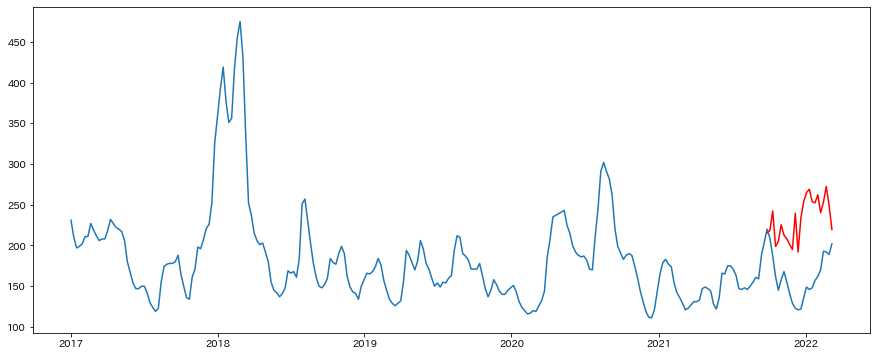

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
bestPred = result.predict('2021-09-27', '2022-03-07',exog=X_pred,freq="W-MON")
plt.plot(df["キャベツ"])
plt.plot(bestPred, "r")

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["キャベツ"],bestPred)

6185.751132060192